Shape:  (3, 9)
SH:  [[ 0.53722441 -0.22952415  0.21743667  0.12215289 -0.34730271 -0.1184438
  -0.04316824  0.03760399  0.03268198]
 [ 0.41207306 -0.15525864  0.2036154   0.11134934 -0.26797527 -0.09002443
  -0.09807479  0.03172606  0.0069172 ]
 [ 0.25164731 -0.04757546  0.06471696  0.1294544  -0.11017405 -0.01730985
  -0.15768046  0.04187608 -0.05110194]]
SH.T:  [[ 0.53722441  0.41207306  0.25164731]
 [-0.22952415 -0.15525864 -0.04757546]
 [ 0.21743667  0.2036154   0.06471696]
 [ 0.12215289  0.11134934  0.1294544 ]
 [-0.34730271 -0.26797527 -0.11017405]
 [-0.1184438  -0.09002443 -0.01730985]
 [-0.04316824 -0.09807479 -0.15768046]
 [ 0.03760399  0.03172606  0.04187608]
 [ 0.03268198  0.0069172  -0.05110194]]
(3, 2, 3, 3)
[[ 0.53722441  0.          0.        ]
 [ 0.21743667  0.12215289  0.        ]
 [-0.04316824  0.03760399  0.03268198]]
[[ 0.          0.          0.        ]
 [ 0.         -0.22952415  0.        ]
 [ 0.         -0.1184438  -0.34730271]]
(3, 2, 3, 3)
[[ 1.68774027  0.   

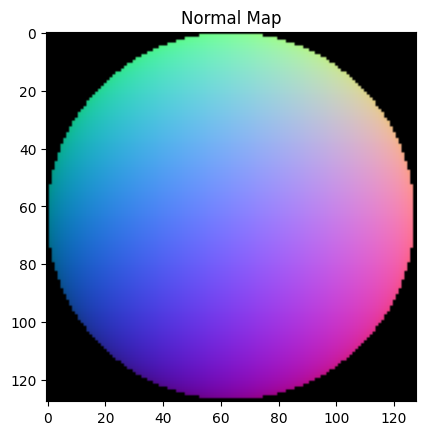

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..3.4299622641239367].


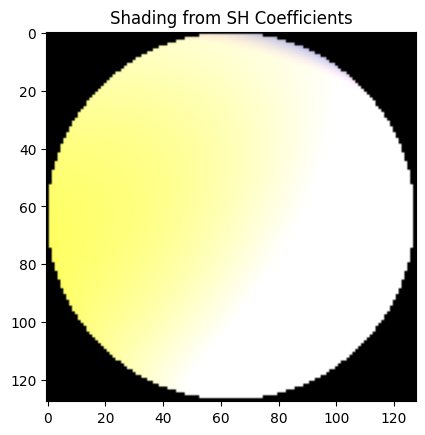

(128, 128, 3) 3.4299622 0.36613253
(128, 128, 3) 0.7225899 0.28447056


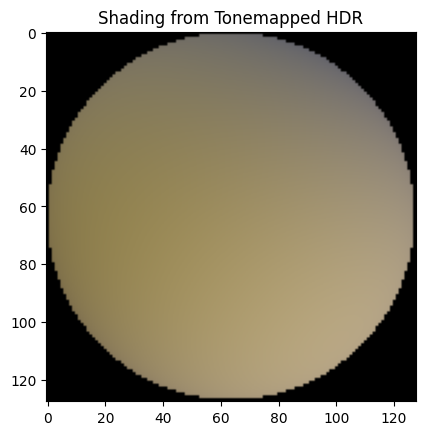

HDR Image Shape:  (512, 1024, 3)
393.79688 0.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..393.79688].


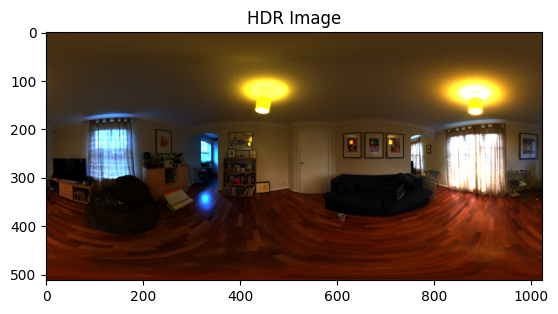

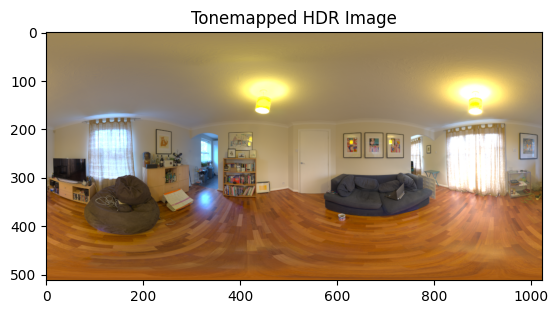

In [ ]:
import numpy as np
from sh_utils import unfold_sh_coeff, flatten_sh_coeff, apply_integrate_conv, sample_from_sh, genSurfaceNormals, cartesian_to_spherical, from_x_left_to_z_up
from tonemapper import TonemapHDR
import matplotlib.pyplot as plt
import skimage

ORDER = 2
map_name = "117_hdrmaps_com_free_2K.exr"
# map_name = "128_hdrmaps_com_free_2K.exr"
# map_name = "125_hdrmaps_com_free_2K.exr"

# sh = np.load('./shcoeffs/012_hdrmaps_com_free_2K.exr.npy')
# sh = np.load('./shcoeffs/064_hdrmaps_com_free_2K.exr.npy')
sh = np.load(f'./shcoeffs/{map_name}.npy')
print("Shape: ", sh.shape)
print("SH: ", sh)
print("SH.T: ", sh.T)

unfolded = unfold_sh_coeff(sh, max_sh_level=2)
print(unfolded.shape)
print(unfolded[0][0])
print(unfolded[0][1])

# print(unfolded[1][0])
# print(unfolded[1][1])

# print(unfolded[2][1])
# print(unfolded[2][0])

apply_integrated = apply_integrate_conv(unfolded.copy())
print(apply_integrated.shape)
print(apply_integrated[0][0])
# print(unfolded[0][0] * np.pi)
# print(apply_integrated[0][1])

normal_map = genSurfaceNormals(128).permute(1, 2, 0).cpu().numpy()
# normal_map = from_x_left_to_z_up(normal_map)
mask = (normal_map[..., 2:3] != 0)
print(normal_map.max(), normal_map.min())
plt.imshow(((normal_map + 1) * 0.5) * mask)
plt.title("Normal Map")
plt.show()

theta, phi = cartesian_to_spherical(normal_map)
shading = sample_from_sh(apply_integrated, lmax=ORDER, theta=theta, phi=phi)
plt.imshow(shading * mask)
plt.title("Shading from SH Coefficients")
plt.show()

# #ezexr.imwrite(output_path.replace(".png",".exr"), shading)   
tonemapper = TonemapHDR()
shading = np.float32(shading)
print(shading.shape, np.max(shading), np.min(shading))
shading, _, _ = tonemapper(shading) # tonemap
print(shading.shape, np.max(shading), np.min(shading))

plt.imshow(shading * mask)
plt.title("Shading from Tonemapped HDR")
plt.show()

hdr_map = f"/home/mint/Dev/DiFaReli++/TPAMI_baseline_MajorRevision/Neural_Gaffer/demo/environment_map_sample/{map_name}"
# Load hdr 
hdr_image = skimage.io.imread(hdr_map)
hdr_image = skimage.img_as_float(hdr_image)
print("HDR Image Shape: ", hdr_image.shape)
print(np.max(hdr_image), np.min(hdr_image))
plt.imshow(hdr_image)
plt.title("HDR Image")
plt.show()
hdr_tm, _, _ = tonemapper(hdr_image)
plt.imshow(hdr_tm)
plt.title("Tonemapped HDR Image")
plt.show()